# Predicting customer churn (attrition)

### By: Raphael Rivers

# Confusion Matrix and ROC Curve for all Models

In [1]:
# Import all modules and read in dataset
from modules import*

In [2]:
# Function to compute model confusion metrics and plot results

def evaluate_model(a_formula, training_data, threshold=0.5):
    
    # Fit the model
    fit_model = smf.logit(formula=a_formula, data=training_data).fit()
    
    # Predict probabilities and classes
    training_data['pred_probability'] = fit_model.predict(training_data)
    training_data['pred_class'] = np.where(training_data['pred_probability'] > threshold, 1, 0)
    
    # Compute confusion matrix
    cm = confusion_matrix(training_data['churn'], training_data['pred_class'])
    TN, FP, FN, TP = cm.ravel()
    
    # Class metrics
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    FPR = 1 - Specificity
    ROC_AUC = roc_auc_score(training_data['churn'], training_data['pred_probability'])
    
    # Plot confusion matrix and ROC 
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot confusion matrix as heatmap
    sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20}, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for Model: {formula_list.index(a_formula)}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, _ = roc_curve(training_data['churn'], training_data['pred_probability'])

    # Plot ROC curve
    axes[1].plot(fpr, tpr, lw=2, label=f'ROC curve (area = {ROC_AUC:.2f})')
    axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('FPR')
    axes[1].set_ylabel('TPR')
    axes[1].set_title(f'ROC for Model: {formula_list.index(a_formula)}')
    axes[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()
    
    # Return the metrics
    return {
        'Accuracy': Accuracy,
        'Sensitivity': Sensitivity,
        'Specificity': Specificity,
        'FPR': FPR,
        'ROC_AUC': ROC_AUC
    }


In [3]:
# retrive models and numeric clusters
%store -r formula_list
%store -r fit_df

Optimization terminated successfully.
         Current function value: 0.407497
         Iterations 6


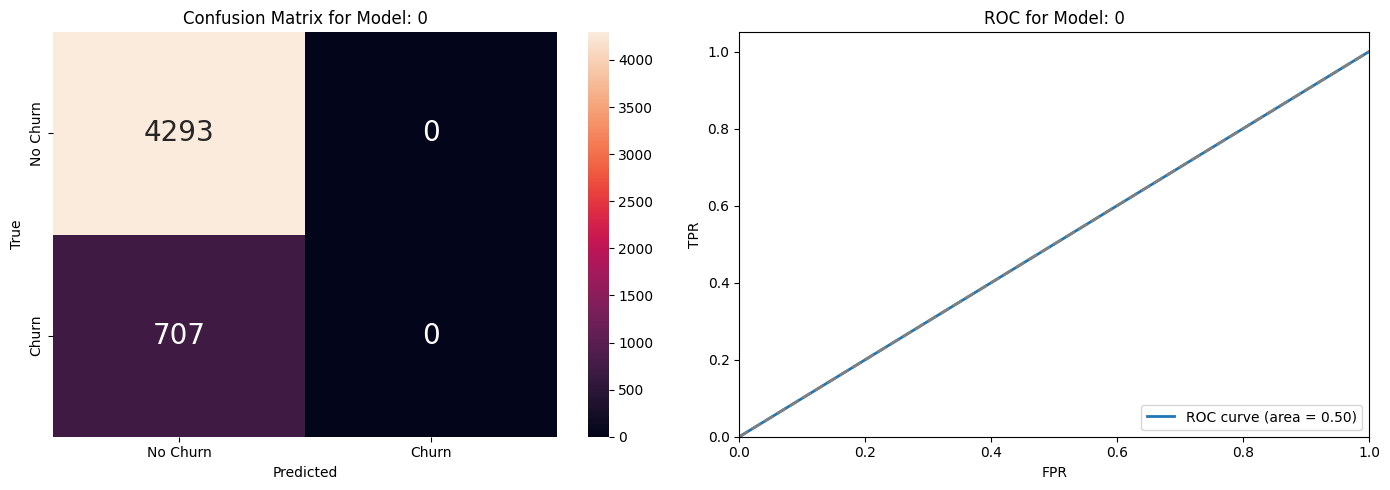

Optimization terminated successfully.
         Current function value: 0.385385
         Iterations 6


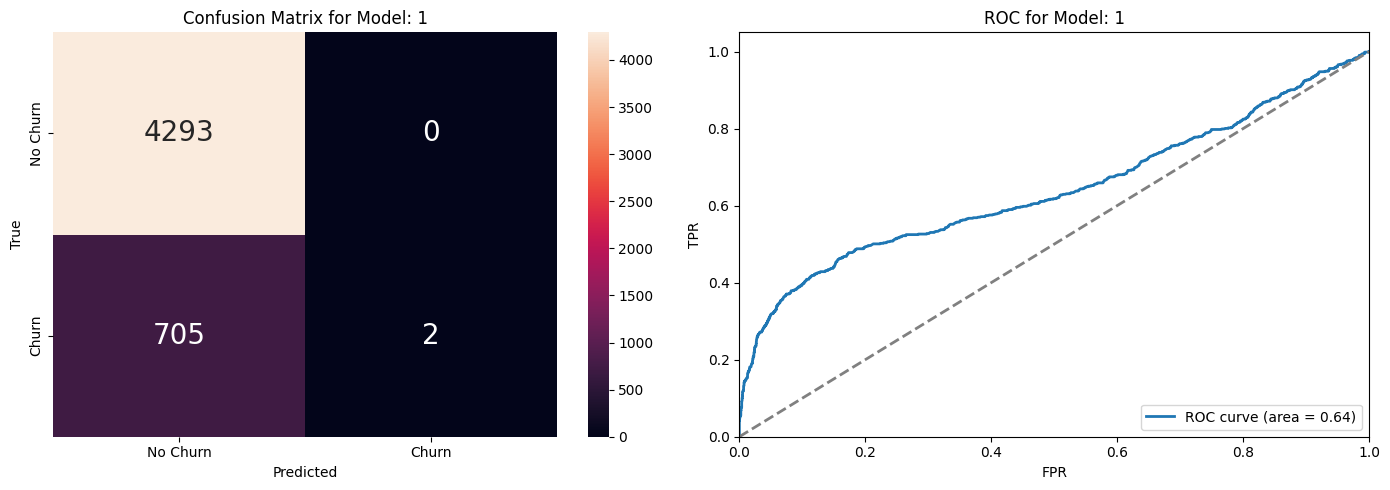

Optimization terminated successfully.
         Current function value: 0.377481
         Iterations 7


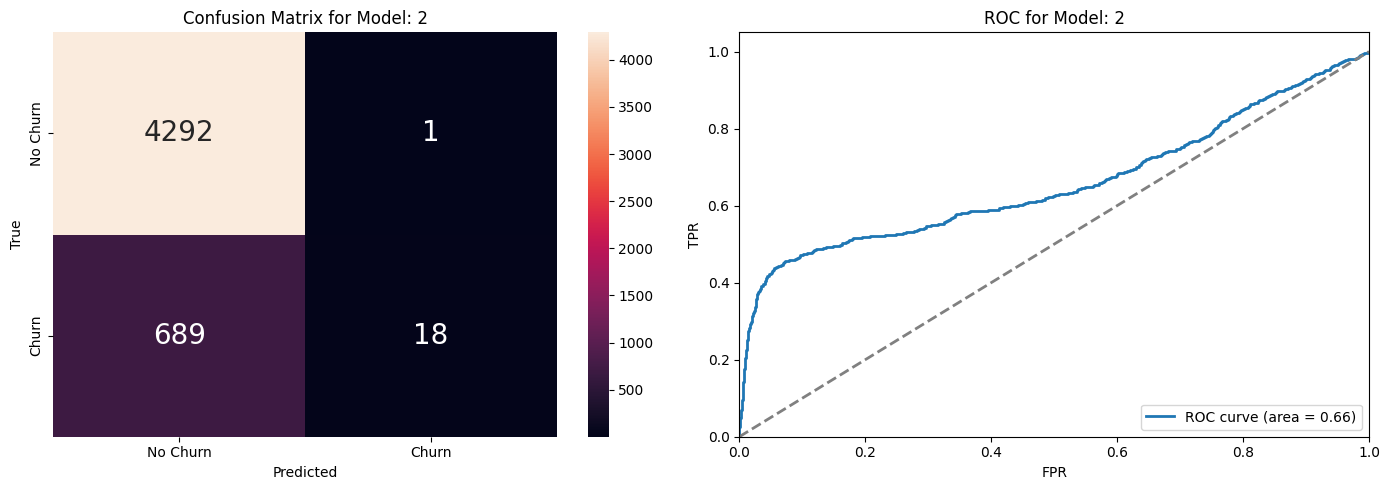

Optimization terminated successfully.
         Current function value: 0.377221
         Iterations 7


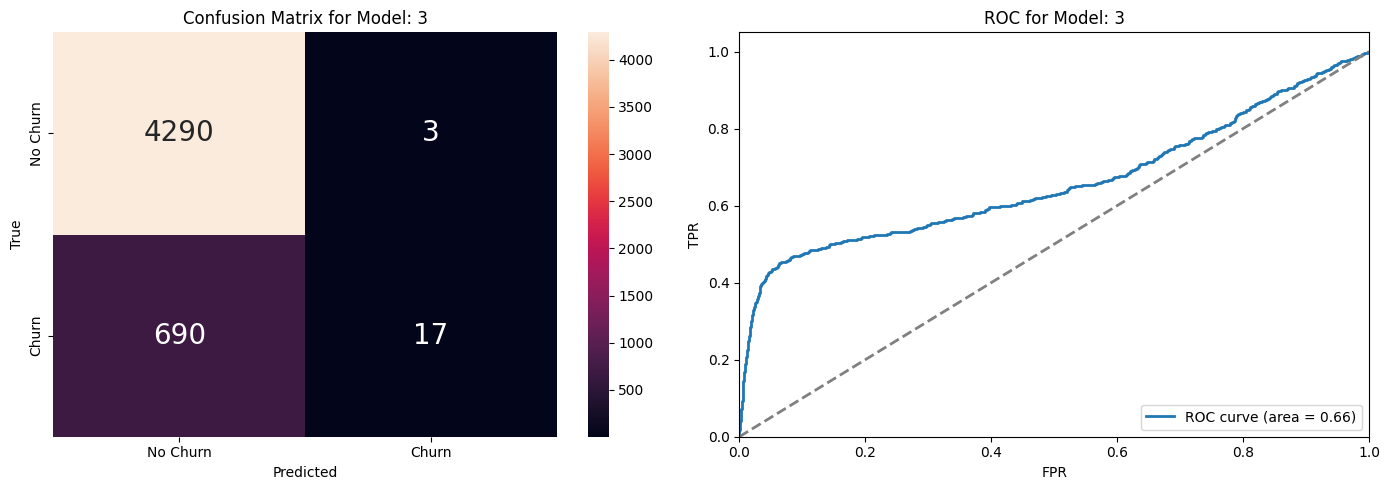

Optimization terminated successfully.
         Current function value: 0.376452
         Iterations 7


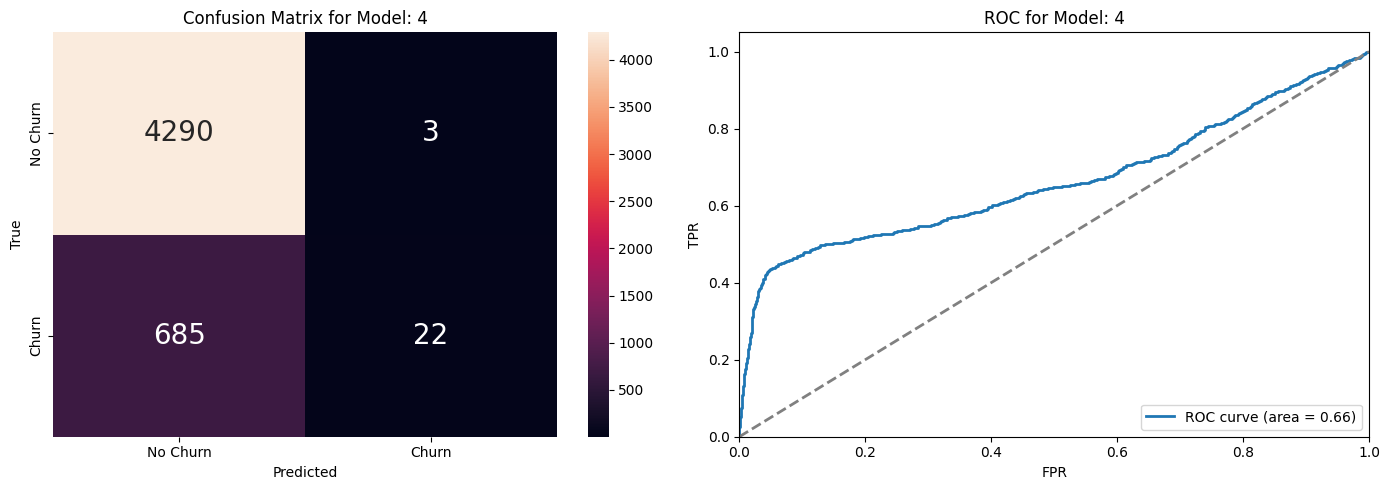

Optimization terminated successfully.
         Current function value: 0.363993
         Iterations 7


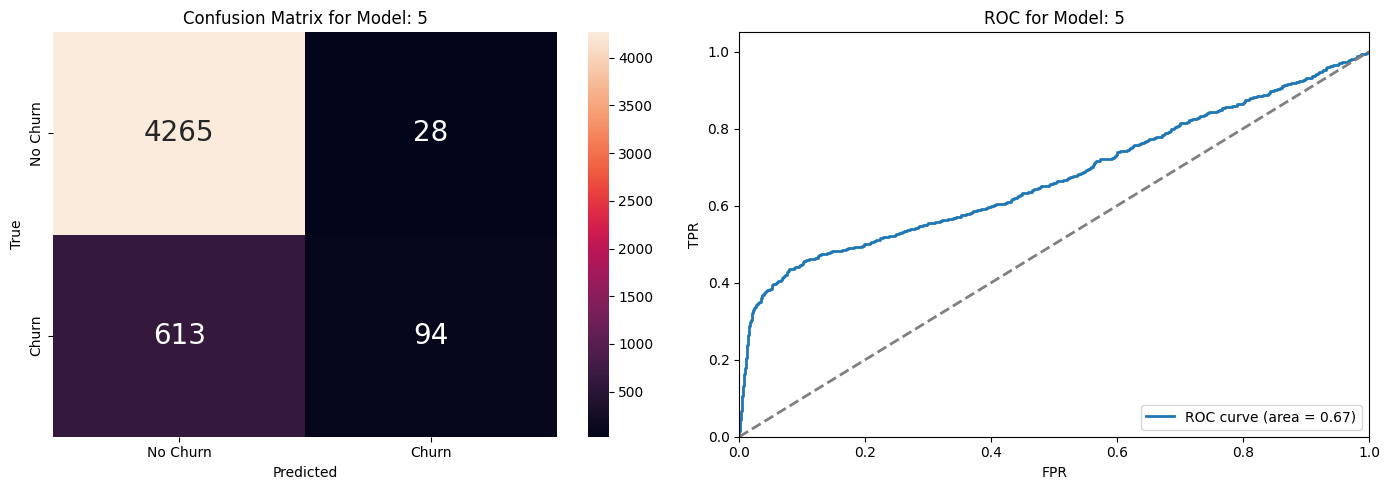

Optimization terminated successfully.
         Current function value: 0.357125
         Iterations 7


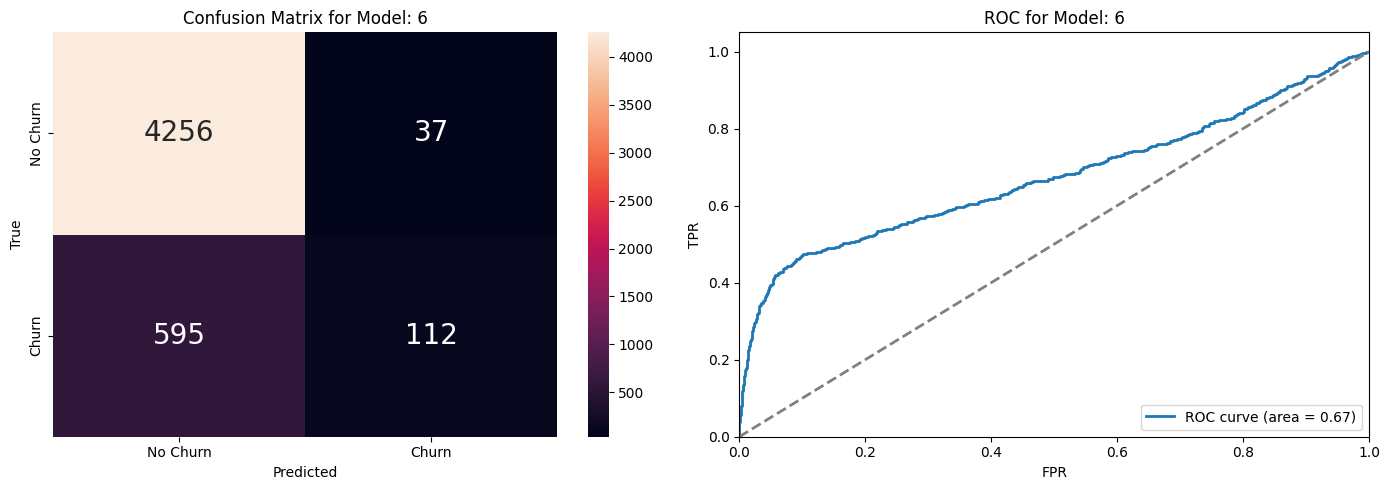

Optimization terminated successfully.
         Current function value: 0.356994
         Iterations 7


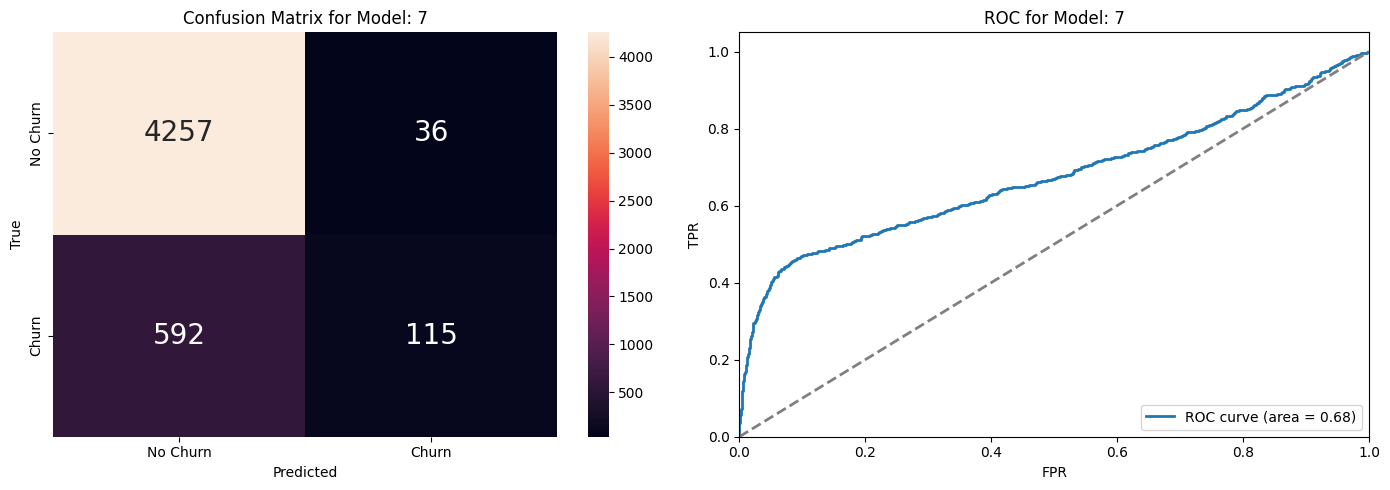

Optimization terminated successfully.
         Current function value: 0.353014
         Iterations 7


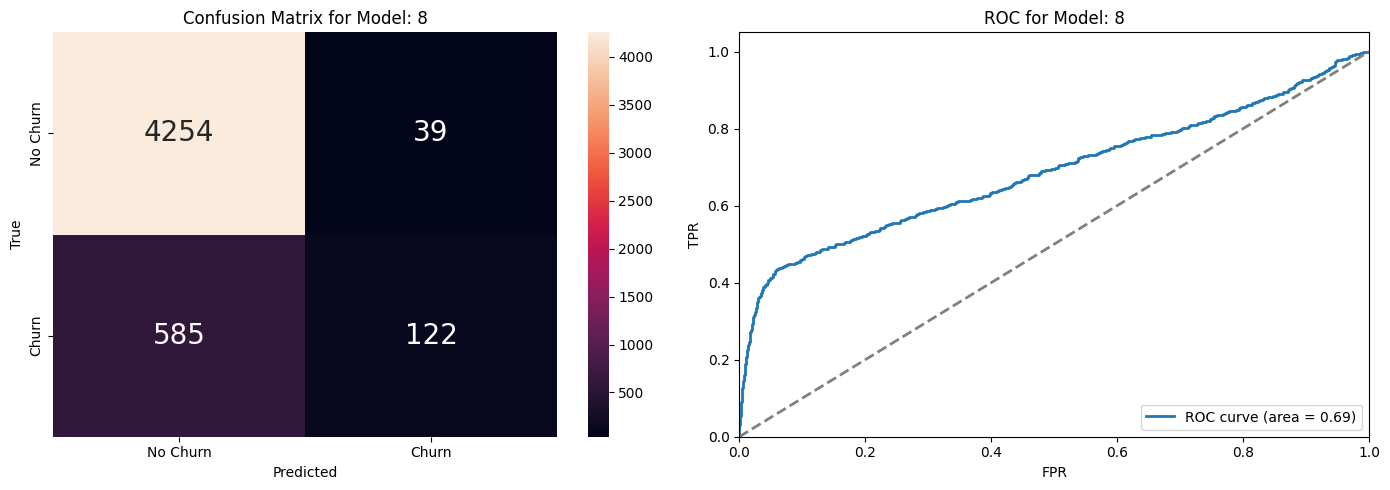

In [4]:
# Evaluate each model and store the results
model_metrics = []

for formula in formula_list:
    metrics = evaluate_model(formula, fit_df)
    metrics['Model'] = formula_list.index(formula)
    metrics['Formula'] = formula
    model_metrics.append(metrics)

# Convert the results into a DataFrame
metrics_df = pd.DataFrame(model_metrics)

### Best Performing Model By Accuracy vs ROC_AUC

In [5]:
# Best Performing Model by Accuracy
metrics_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC,Model,Formula
8,0.8752,0.172560,0.990915,0.009085,0.687465,8,churn ~ pca_cluster * (total_day_minutes + tot...
7,0.8744,0.162659,0.991614,0.008386,0.675339,7,churn ~ pca_cluster + total_day_minutes + tota...
6,0.8736,0.158416,0.991381,0.008619,0.674831,6,churn ~ total_day_minutes + total_eve_minutes ...
5,0.8718,0.132956,0.993478,0.006522,0.672946,5,churn ~ (total_day_minutes + total_eve_minutes...
4,0.8624,0.031117,0.999301,0.000699,0.664471,4,churn ~ pca_cluster * (total_day_minutes + tot...
2,0.8620,0.025460,0.999767,0.000233,0.659236,2,churn ~ total_day_minutes + total_eve_minutes ...
3,0.8614,0.024045,0.999301,0.000699,0.659801,3,churn ~ total_day_minutes + total_eve_minutes ...
1,0.8590,0.002829,1.000000,0.000000,0.640135,1,churn ~ total_day_minutes
0,0.8586,0.000000,1.000000,0.000000,0.500000,0,churn ~ 1


`Model 8` is the best performing model with proportion of correct classifications of `0.8752`

In [6]:
# Best Performing Model by ROC_AUC
metrics_df.sort_values(by='ROC_AUC', ascending=False)

,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC,Model,Formula
8,0.8752,0.172560,0.990915,0.009085,0.687465,8,churn ~ pca_cluster * (total_day_minutes + tot...
7,0.8744,0.162659,0.991614,0.008386,0.675339,7,churn ~ pca_cluster + total_day_minutes + tota...
6,0.8736,0.158416,0.991381,0.008619,0.674831,6,churn ~ total_day_minutes + total_eve_minutes ...
5,0.8718,0.132956,0.993478,0.006522,0.672946,5,churn ~ (total_day_minutes + total_eve_minutes...
4,0.8624,0.031117,0.999301,0.000699,0.664471,4,churn ~ pca_cluster * (total_day_minutes + tot...
3,0.8614,0.024045,0.999301,0.000699,0.659801,3,churn ~ total_day_minutes + total_eve_minutes ...
2,0.8620,0.025460,0.999767,0.000233,0.659236,2,churn ~ total_day_minutes + total_eve_minutes ...
1,0.8590,0.002829,1.000000,0.000000,0.640135,1,churn ~ total_day_minutes
0,0.8586,0.000000,1.000000,0.000000,0.500000,0,churn ~ 1


`Model 8` still tops as the best performing model with an ROC_AUC proportion of `0.6875`

### Results Interpretation
The two models with the highest magnitude and classification proportions are `Model 8` and `Model 5`, which correlate with models with the highest statistically significant coefficient. The clusters provide valuable features that enhance the prediction of churn by capturing distinct customer segments. Evaluating the performance metrics helps in understanding how well the model is predicting churn. The combination of clustering and churn prediction enables targeted interventions for high-risk segments, improving customer retention strategies.

By integrating clustering results into the churn prediction model, businesses can achieve a more nuanced understanding of customer behavior and improve the accuracy of their churn predictions. This approach leverages the strengths of both unsupervised and supervised learning techniques to provide actionable insights.